# Quem são seus clientes-alvo com os quais você pode iniciar a estratégia de marketing?

Você é o dono de uma loja e por meio de cartões de sócio, tem alguns dados básicos sobre seus clientes, como ID do cliente, idade, sexo, renda anual e pontuação de gastos.

Pontuação de gastos é algo que você atribui ao cliente com base em seus parâmetros definidos, como comportamento do cliente e dados de compra.

## Objetivo 

Entender os grupos de clientes de uma loja para direcionar à equipe de marketing em planejar uma adequada estratégia de oferta para cada cliente-alvo.

## Dataset

Link do dataset: <a href="https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python" target="_blanck"> Kaggle - Mall Customer Segmentation Data</a>

## Importando as bibliotecas e os dados

In [10]:
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight')

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import plotly.offline as py
import plotly.graph_objs as go

In [4]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Grupos de Consumidores baseado em suas Rendas Anuais

Vamos tentar separa os clientes nos baseando na renda anual e na pontuação de gastos.

In [5]:
# Seleciona as colunas 'Anual Income' e 'Spending Score'
X = data.iloc[:,[3,4]]

### K-Means

O algoritmo KMeans agrupa os dados tentando separar amostras em n grupos de variância igual, minimizando um critério conhecido como inércia ou soma dos quadrados dentro do cluster. Este algoritmo requer que o número de clusters seja especificado.

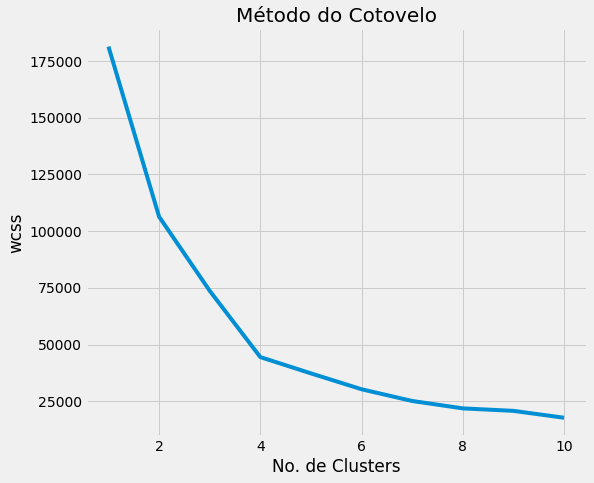

In [50]:
# Método do cotovelo para encontrar o número e clusters
wcss = []
for n in range(2, 12):
    km = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(8,7))
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo', fontsize = 20)
plt.xlabel('No. de Clusters')
plt.ylabel('wcss')
plt.show()

No gráfico acima, a curva forma uma curva (formato e cotovelo) para n=4. Vamos escolher n=5 como valor de cluster para nosso caso e estudo, pois nesse valor não existe mais mudança abrupta na curva.

In [25]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

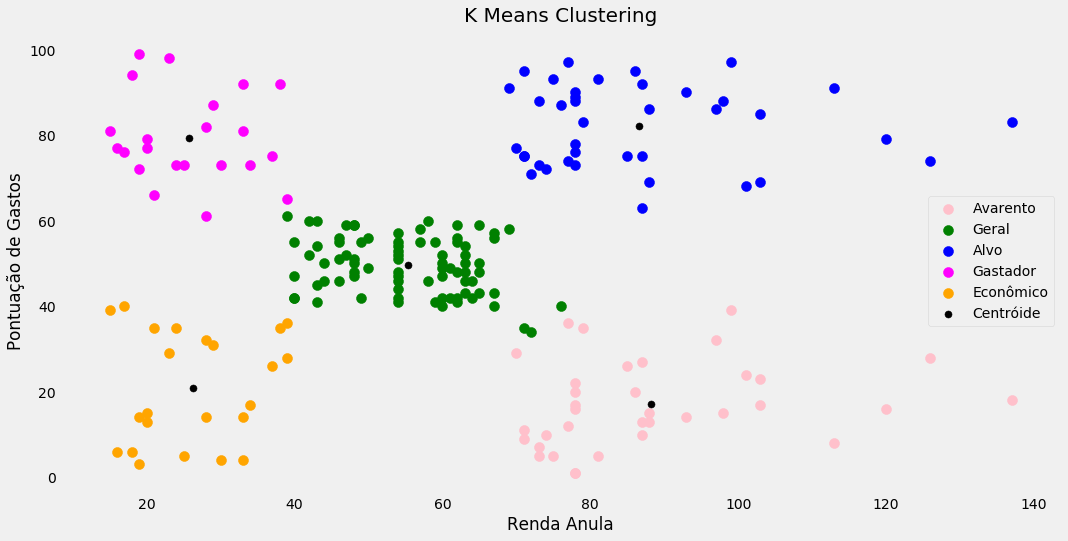

In [29]:
plt.figure(figsize=(16,8))
plt.scatter(X.iloc[y_means == 0, 0], X.iloc[y_means == 0, 1], s = 100, c = 'pink', label = 'Avarento')
plt.scatter(X.iloc[y_means == 1, 0], X.iloc[y_means == 1, 1], s = 100, c = 'green', label = 'Geral')
plt.scatter(X.iloc[y_means == 2, 0], X.iloc[y_means == 2, 1], s = 100, c = 'blue', label = 'Alvo')
plt.scatter(X.iloc[y_means == 3, 0], X.iloc[y_means == 3, 1], s = 100, c = 'magenta', label = 'Gastador')
plt.scatter(X.iloc[y_means == 4, 0], X.iloc[y_means == 4, 1], s = 100, c = 'orange', label = 'Econômico')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'Centróide')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Renda Anula')
plt.ylabel('Pontuação de Gastos')
plt.legend()
plt.grid()
plt.show()

Esta análise de agrupamento nos dá uma visão muito clara sobre os diferentes segmentos de clientes na loja. Existem claramente cinco segmentos de clientes. Com base em sua Receita Anual e Pontuação de Gastos, que são declaradamente os melhores fatores/atributos para determinar os segmentos de um cliente na loja, chamamos cada grupo de clientes como:

* Avarento: Tem alta renda mas não compra pouco;
* Geral: público geral, renda média e compra o necessário;
* Alvo: renda alta e compra bastante;
* Gastador: renda baixa mas compra muito;
* Econômico: baixa renda e compra pouco.

## Clusters de Consumidores baseados em suas Idades

Partindo de outra abordagem, vamos separar os clientes baseado em suas idades e pontuação de gastos.

In [14]:
# Seleciona as colunas 'Age' e 'Spending Score'
x = data.iloc[:, [2, 4]]

### Hierarchial Clustering (Agglomerative Clustering)

O clustering hierárquico é uma família geral de algoritmos de clustering que constroem clusters aninhados mesclando-os ou dividindo-os sucessivamente. Esta hierarquia de clusters é representada como uma árvore (ou dendrograma). A raiz da árvore é o cluster único que reúne todas as amostras, sendo as folhas os clusters com apenas uma amostra.

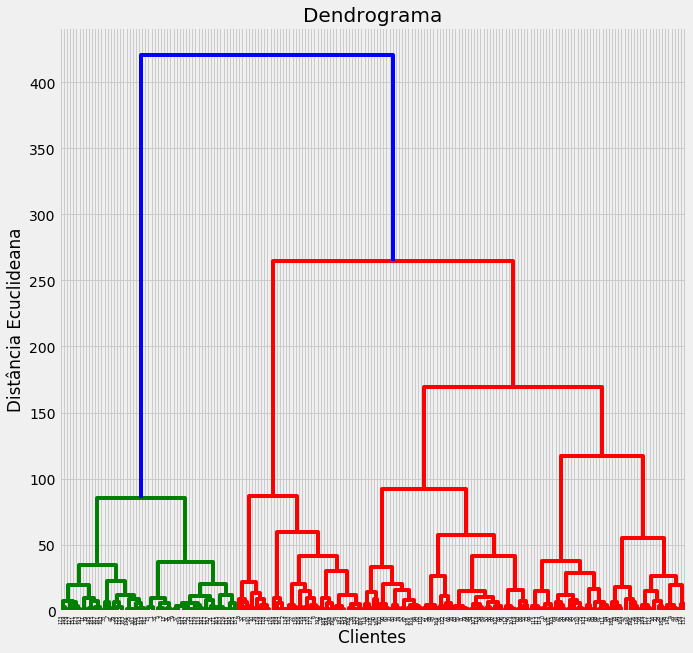

In [30]:
# Usando dendogramas para encontrar o número e clusters
dendrograma = dendrogram(linkage(x, method = 'ward'))

plt.title('Dendrograma', fontsize = 20)
plt.xlabel('Clientes')
plt.ylabel('Distância Ecuclideana')
plt.show()

In [40]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

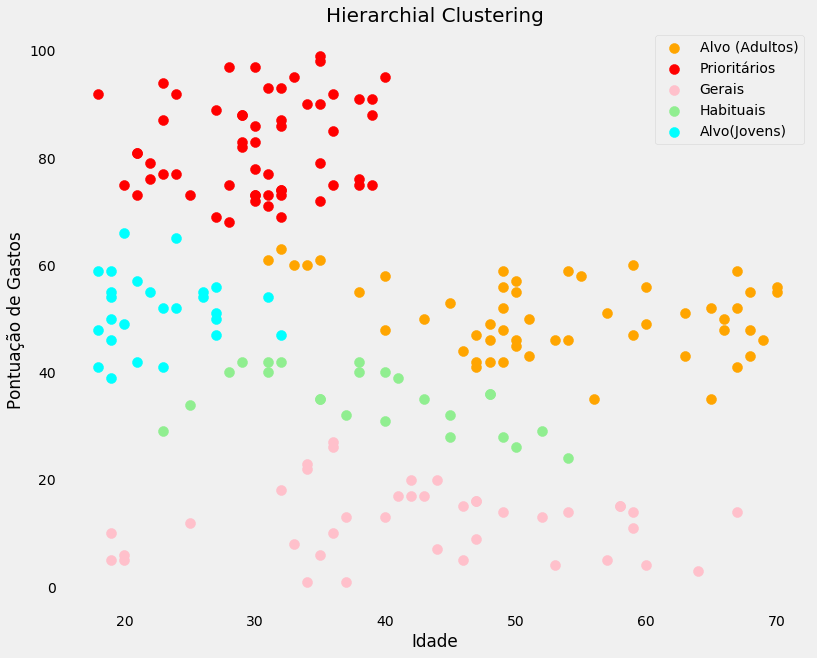

In [49]:
plt.figure(figsize=(12,10))
plt.scatter(x.iloc[y_hc == 0, 0], x.iloc[y_hc == 0, 1], s = 100, c = 'orange', label = 'Alvo (Adultos)')
plt.scatter(x.iloc[y_hc == 1, 0], x.iloc[y_hc == 1, 1], s = 100, c = 'red', label = 'Prioritários')
plt.scatter(x.iloc[y_hc == 2, 0], x.iloc[y_hc == 2, 1], s = 100, c = 'pink', label = 'Gerais')
plt.scatter(x.iloc[y_hc == 3, 0], x.iloc[y_hc == 3, 1], s = 100, c = 'lightgreen', label = 'Habituais')
plt.scatter(x.iloc[y_hc == 4, 0], x.iloc[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Alvo(Jovens)')

#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Idade')
plt.ylabel('Pontuação de Gastos')
plt.legend()
plt.grid()
plt.show()


Olhando para o gráfico de agrupamento acima entre a idade dos clientes e suas pontuações de gastos correspondentes, agregamos 5 categorias diferentes:
* Clientes gerais: de todas as idades e compram pouco;
* Clientes habituais: idade entre 20-60 anos e compram regularmente;
* Clientes Alvo adulto: idade entre 30-70 anos e compram bastante;
* Clientes Alvo jovens: idade abaixo dos 30 e compram bastante;
* Clientes prioritários: idade entre 20-40 e compram muito.

## Cluster de Clientes usando Idade e Renda Anual

Por último, vamos misturar as duas variáveis, idade e renda anual, junto com a pontuação de gastos.

In [46]:
p = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(p)
labels = km.labels_
centroids = km.cluster_centers_

In [47]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

Vemos 5 grupos de clientes bem separados, que é simplesmente a combinação dos análises que fizemos antes

## Conclusão

Em mãos dos resultados obtidos, podemos fazer diferentes estratégias e políticas de marketing para otimizar as pontuações de gastos do cliente e aumentar o faturamento da loja.